<a href="https://colab.research.google.com/github/iaagulo/Machine-Learning-Basics/blob/main/Ch02_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.0 Gradient Descent<br>
First, let's upload the modules that we need.

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

Consider this relation between two variables, $x$ and $y$.

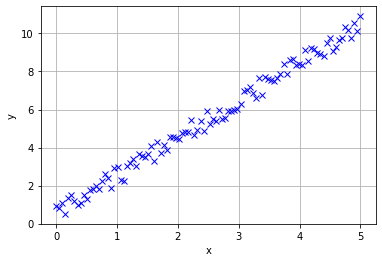

In [228]:
m = 2
b = 0.5

x = np.linspace(0,5,100)
y = addrandomfluctuations(x,m,b,1)
plt.plot(x,y,'bx')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

*Figure 2.1. A data set that forms a straight line.*

##2.1 The Cost Function<br>
The cost function describes is a measure of the error between the expected value and the measured value. The higher the error, the more it "costs" to correct the error. Thus, the goal is to minimize the error, and therefore, the cost function. <br>
Consider the linear given data set plotted against the best fit line. For this example, the cost function, $J(\theta_0,\theta_1)$, is given by the expression<br>
$J(\theta_0,\theta_1)=\frac{1}{2n}\sum_{i=1}^{n} [(\theta_0 + \theta_1 x_i)-y_i]^2$<br>
where $(\theta_0 + \theta_1 x_i)$ is the equation of the best fit line described by its slope, $\theta_1$, and y-intercept, $\theta_0$, and  is the measured value at the $i^{th}$ data point. Thus, the term in the square brackets $(\theta_0 + \theta_1 x_i)-y_i$ corresponds to the difference between the best fit line and the measured values. When the cost function is minimized, we have the optimum value for the slope, $\theta_1$, and y-intercept, $\theta_0$, and the term  is small as it could be for each data point. In Figure 2.2, the term  is the value between each of the blue crosses and the value of the best fit line corresponding to $x_i$.

(0.0, 0.5, 0.0, 2.0)

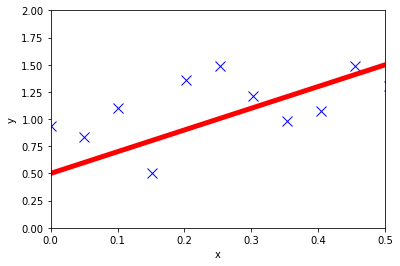

In [229]:
plt.plot(x,y,'bx', markersize=10,linewidth=2)
ylr = addrandomfluctuations(x,m,b,0)
plt.plot(x,ylr,'r', linewidth=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 0.5, 0, 2])

*Figure 2.2. The difference between the blue crosses and the red line at each data point, $x_i$, corresponds to the term $(\theta_0 + \theta_1 x_i)-y_i$.*

Let's also display the first few data points by assigning the datasets to a table.

In [230]:
from tabulate import tabulate

T = [[x,y]]
print(tabulate(T,headers=['X Data','Y Data']))

X Data                                                              Y Data
------------------------------------------------------------------  ------------------------------------------------------------------------
[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525  [ 0.93802221  0.83392839  1.1063297   0.5083411   1.36220339  1.48933181
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556    1.21250399  0.97890659  1.07695781  1.48968565  1.30057936  1.75188381
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586    1.83509986  1.95866342  1.82405493  2.22064556  2.60177803  2.38099689
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616    1.87433003  2.91117411  2.99679933  2.30361597  2.24342961  3.02033114
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646    3.1849691   3.40474078  3.00891004  3.66953013  3.58097261  3.50758253
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677    3.6410091

Let's try to understand what is happening here and what it means to our data when we minimize one of these parameters. Let's set the y-intercept to $\theta_0=0.5$ and then vary the slope of the line, $\theta_1$. While we vary the slope, we take a look at the cost function.<br>
Watch this video and try to figure out what the value of $\theta_1$ is that minimizes the cost function. The function *costfunction_2D()* is defined at the end of this script and solves for the costfunction. To plot the result, we defined the plot_costfunction_2D() located at the end of this script. Here the y-intercept is fixed and the slope is varied. So, the red line is fixed at one end and just sweeps over an area on the graph eventually passing through all the data points neatly, which corresponds to when the cost function has a minimum value.

In [ ]:
theta0 = np.array([0.5])
theta1 = np.arange(0,4,0.1)
time = 0.2

J = costfunction_2D(theta0,theta1)
plot_costfunction_2D(theta0,theta1,J,time)

# fig,ax = plt.subplots(1,2,figsize=(8,8))
# ph0, = ax[0].plot(x,ylr,'r')
# ph1, = ax[1].plot(theta1,J[0,:],'bx')

# def animate(i):
#   ylr = addrandomfluctuations(x,theta1[:i],theta0,0)
#   ph0.set_data(x, ylr)
#   ph1.set_data(theta1[:i],J[0,:i])
#   return [ph0,ph1]

# ani = animation.FuncAnimation(fig, animate, interval=1000)
# plt.show()

# ani.save('CostFunction.mp4', writer = 'ffmpeg', fps = 30)

*Video 2.1. As the value of $\theta_1$ varies from 0 to 4, we see the red line slowly becoming closer to the blue data points until it fits nicely. This corresponds to the minimum value of the cost function.*

We can observe the same thing if we set the slope $\theta_1=2$ and vary the y-intercept, $\theta_0$.<br>
Watch this video and try to figure out what the value of $\theta_1$ is that minimizes the cost function. Here the slope is fixed and the y-intercept is varied. So, the red line slowly rises from a low y-intercept value to a high y-intercept value. At some value $\theta_0$, the red line passes through all the points neatly, which corresponds to when the cost function has a minimum value.

In [ ]:
theta0 = np.arange(-2,2,0.1)
theta1 = np.array([2])
time = 0.2

J = costfunction_2D(theta0,theta1)
plot_costfunction_2D(theta0,theta1,J,time)

*Video 2.2. As the value of $\theta_0$ varies from -2 to 2, we see the red line slowly becoming closer to the blue data points until it fits nicely. This corresponds to the minimum value of the cost function.*

#Functions to be used for this chapter

Let's define all the functions that we are going to use.

In [226]:
def addrandomfluctuations(x,m,b,fluctuationsize):
  import random

  yrand = np.zeros(len(x))
  for i in range(len(x)):
    yrand[i] = m*x[i] + b + fluctuationsize*(random.random()-0.5)
  
  return yrand

In [208]:
def costfunction_2D(th0,th1):
  n = len(y)

  J = np.zeros([len(theta0),len(theta1)])
  for i in range(len(theta0)):
    for j in range(len(theta1)):
      J[i,j] = (1/(2*n))*np.sum(np.power((theta0[i] + theta1[j]*x - y),2))

  return J

In [224]:
def plot_costfunction_2D(th0,th1,J,time):

  for i in range(len(th0)):
    for j in range(len(th1)):
      fig, ax = plt.subplots(1,2,figsize=(16,8))
      plt.axis([0,5,0,12])
      ylr = addrandomfluctuations(x,th1[j],th0[i],0)
      ax[0].plot(x,ylr,'r', linewidth=5)
      ax[0].plot(x,y,'bx', markersize=10,linewidth=2)
      plt.xlabel('x')
      plt.ylabel('y')

      if th1.shape[0] == 1:
        ax[1].plot(th0[:i],J[:i,j],'bx', markersize=10,linewidth=2)
        plt.xlabel(r'$\theta_0$')
        plt.ylabel('Cost Function, J')
        plt.axis([-2,2,0,4])
      else:
        ax[1].plot(th1[:j],J[i,:j],'bx', markersize=10,linewidth=2)
        plt.xlabel(r'$\theta_1$')
        plt.ylabel('Cost Function, J')
        plt.axis([0,4,0,20])

      plt.show()
      plt.pause(time)
